# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams["font.family"] = "sans-serif"

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/My Drive/foodhub_order.csv')
# returns the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns related to the food order details.

order_id column contains Unique ID of the order

customer_id column contains ID of the customer who ordered the food

restaurant_name contains name of the restaurant

cuisine_type column contains the type of cuisine ordered by the customer

cost column contains Cost of the order

day_of_the_week column indicates whether the order is placed on a weekday or weekend column contains (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

rating column contains Rating given by the customer out of 5

food_preparation_time column contains Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

delivery_time column contains Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between
the timestamps of the delivery person's pick-up confirmation and drop-off information


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of the dataset
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")


There are 1898 rows and 9 columns.


#### Observations:
There are 1898 rows and 9 columns in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are three types of datatypes - int64 , object and float64 for the total 9 column.
The datatype of order_id , customer_id  ,food_preparation_time and  delivery_time is int64.
The datatype of restaurant_name , cuisine_type ,day_of_the_week and  rating  is object.
The datatype of cost_of_the_order is float64.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# checking missing values across each columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no missing value as the result returns that there is none null value in all the columns.Therefore, no treatment is given to the missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# check the statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


- The above table shows the descriptive analysis for the numerical columns.

In [ ]:
#Check the statistical summary for food preparation time in the data
df['food_preparation_time'].describe().T

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
Summary on the data : the cost of the order is ranging from $4.47 to $35.41. The average cost of per order is $16.50

The minimum time for the food to be prepared once an order is place is about 20 min.
The average time for the food to be prepared once an order is place is about 27 min.
The maximum time it takes for food to be prepared once an order is placed is 35.min.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#check the rating value
df.groupby('rating')[['rating']].count()

,rating
rating,
3,188
4,386
5,588
Not given,736


#### Observations:
There are 736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

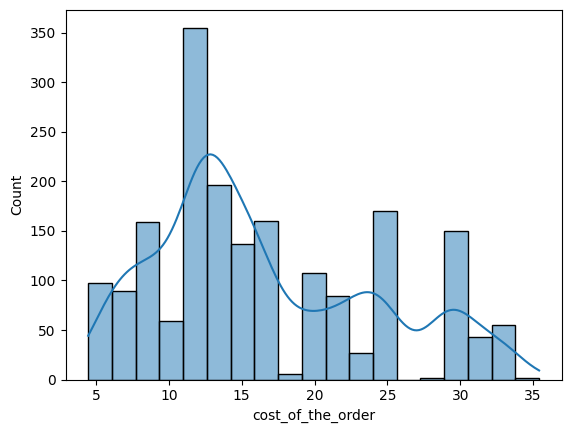

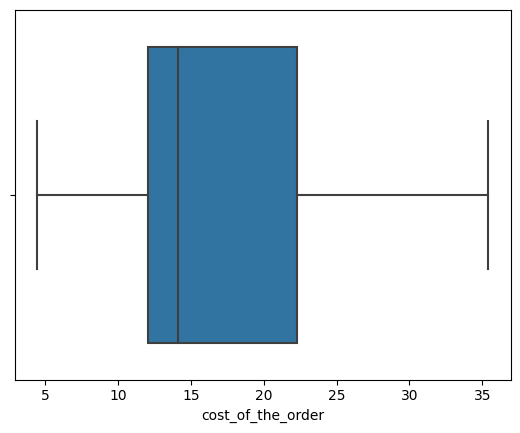

In [ ]:
#Check for the distribution for numerical columns.
sns.histplot(data=df,x='cost_of_the_order',kde = True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

Observation: The boxplot shows that the distribution of cost of the order is right-shewed , with the the median cost is around 14 dollars, indicating a wide spread above the median.

Cost of the order is between 4.47 dollars and 35.41 dollars.

There is no outliers in the boxplot.


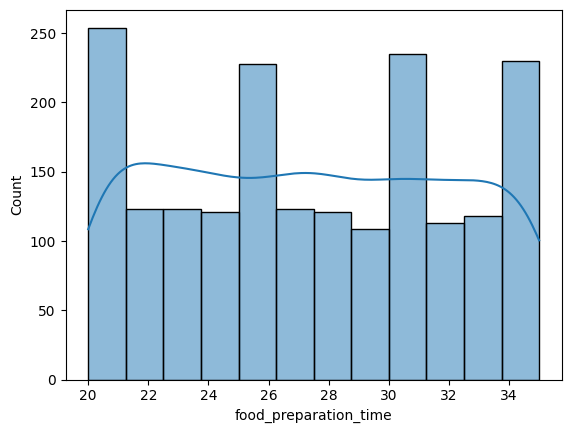

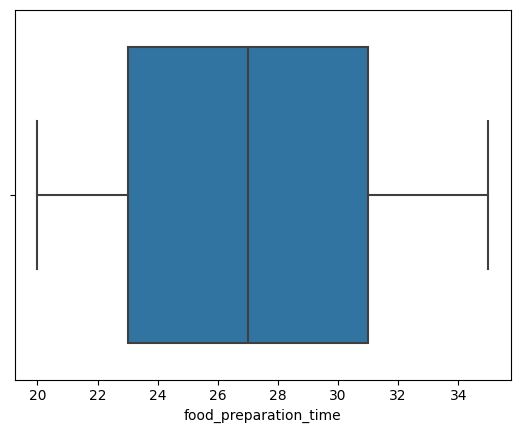

In [ ]:
sns.histplot(data=df,x='food_preparation_time',kde = True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

Both shows that the distrubtion of the food prepartin time is quite fairly even. The preparation time for food is between around 20 min and 35 min.



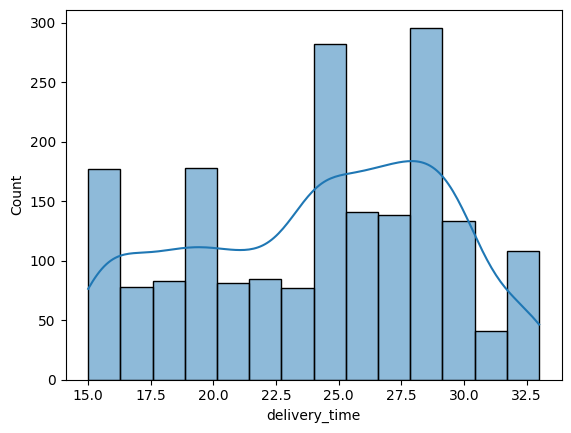

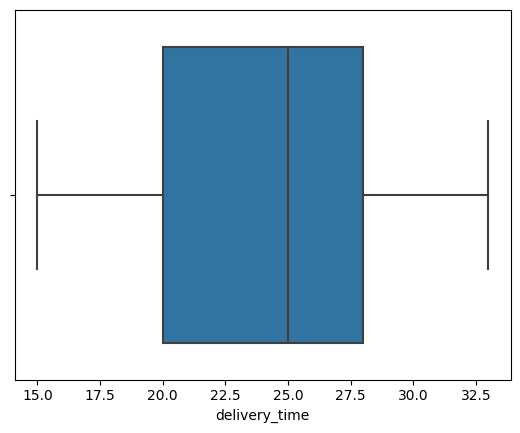

In [ ]:
sns.histplot(data=df,x='delivery_time',kde = True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

Obervation
The boxplot shows that the distrubtion of delivery time is left-shewed. The median of the delivery time is about 25 min. The delivery time is between 15 min and 32.5 min.

From the histplot, it is found that the most order ( around 300 orders) was delivered with around 28min.


In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

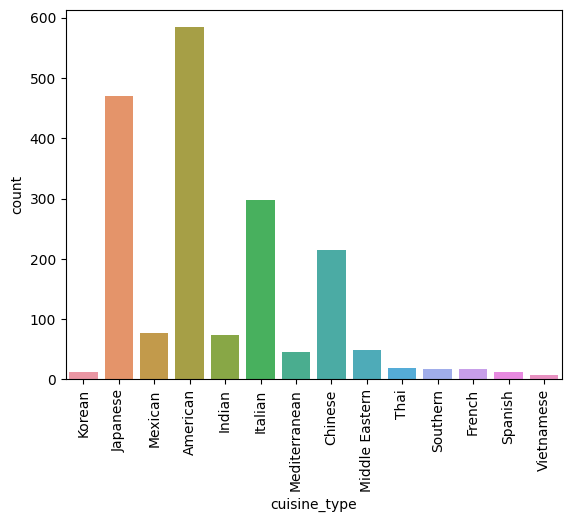

In [ ]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

# Obervation :
There are 14 types of cusines in the data.
The most popular cusine type is Amercian , Japan , Italian , Chinese by order.
The least popular cusine type is Vietnamese.


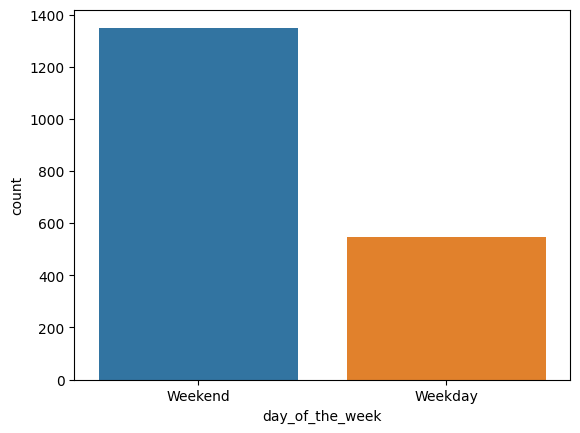

In [ ]:
sns.countplot(data=df,x='day_of_the_week')
plt.show()

In [ ]:
df ['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

From the plot, it is found that more orders were made in weekends, more than 70% orders were made during weekend of the total number of orders made of the week.

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

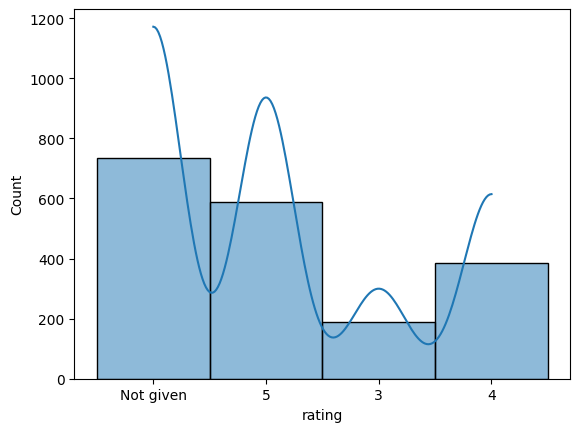

In [ ]:
sns.histplot(data = df, x='rating',stat = 'count',kde = True)
plt.show()

Obervation
The rating which is not given is about 39% in the data. The plot shows that most rating score is 5 for 588 ratings (around 31%).

In [ ]:
# check unique customer ID
df['customer_id'].nunique()

1200

# Observation:
There is a total of 1200 customers.


In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

Observation:
There is a total of 1898 orders.

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

Observation: There is a total of 178 resturants.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Find out the top 5 restaurants in terms of the number of orders received

df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 restaurants in terms of the number of orders received as below -
Top 1 is Shake Shack with 219 orders.
Followed by the Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders,and Parm with 68 order.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Find out the most popular cuisine on weekends
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53
Indian,49,49,49,49,49,49,49,49
Mediterranean,32,32,32,32,32,32,32,32
Middle Eastern,32,32,32,32,32,32,32,32
Thai,15,15,15,15,15,15,15,15


#### Observations:
The most popular cuisine on weekends is American cuisine with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# find out the number of order above 20 dollars in the data
order_above20= df[df['cost_of_the_order'] > 20].count()
print(order_above20)


order_id                 555
customer_id              555
restaurant_name          555
cuisine_type             555
cost_of_the_order        555
day_of_the_week          555
rating                   555
food_preparation_time    555
delivery_time            555
dtype: int64


In [ ]:
# find out the total number of orders in the data
total_count = df['cost_of_the_order'].count()
print(total_count)

1898


In [ ]:
# find out the the orders cost more than 20 dollars by %
percentage = round((order_above20/total_count)*100,2)
percentage

order_id                 29.24
customer_id              29.24
restaurant_name          29.24
cuisine_type             29.24
cost_of_the_order        29.24
day_of_the_week          29.24
rating                   29.24
food_preparation_time    29.24
delivery_time            29.24
dtype: float64



#### Observations: 29.24 % of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# find the mean order delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations:

The mean order delivery time is 24.16 min.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#find out the most frequent customers and number of orders made
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7


#### Observations:
The top 3 most frequent customers with customers ID in order:
customers ID 52832 with 13 orders made,
customers ID 47440 with 10 orders made, and
customers ID 83287 with 9 orders made.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


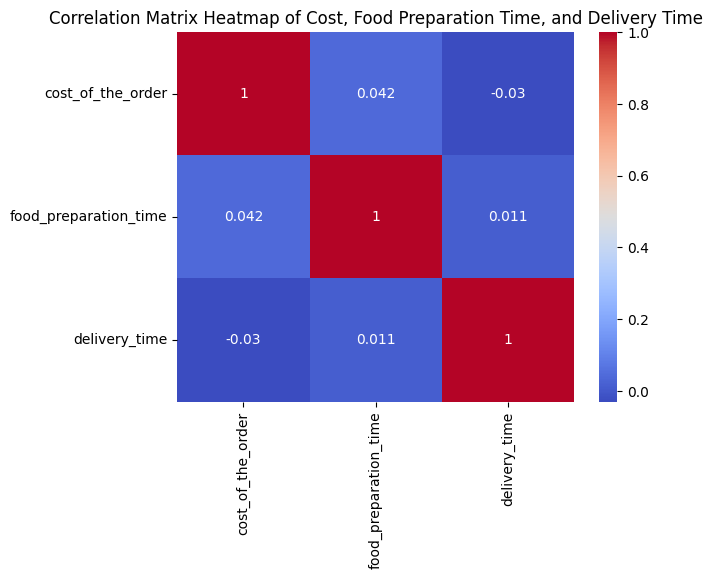

In [ ]:
# Select the numerical variables
cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
subset_df = df[cols]

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

# Create a heatmap of the correlation matrix to see the correlation among numberical variables
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap of Cost, Food Preparation Time, and Delivery Time')
plt.show()


Observations:
The plots show very weak correlation between the variables, such as 0.042 between cost of the order and food preparation time, 0.011 for food preparation time and delivery time and -0.03 for delivery time and cost of the order.

With the weak correlation between these variables, it may be relatively independent of each other.


<Axes: xlabel='rating', ylabel='cost_of_the_order'>

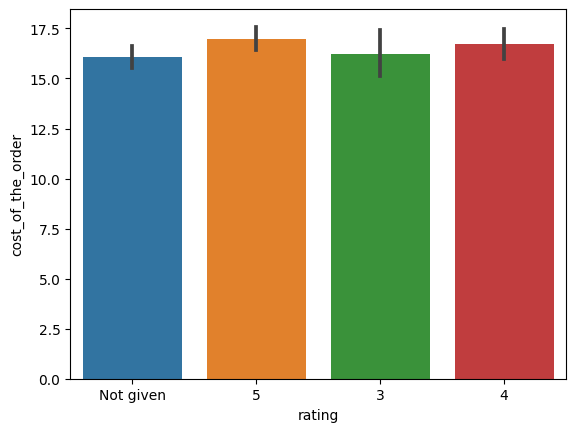

In [ ]:
# relationship between rating and cost of the order
sns.barplot(data = df, x = 'rating', y = 'cost_of_the_order')

<Axes: xlabel='cuisine_type', ylabel='count'>

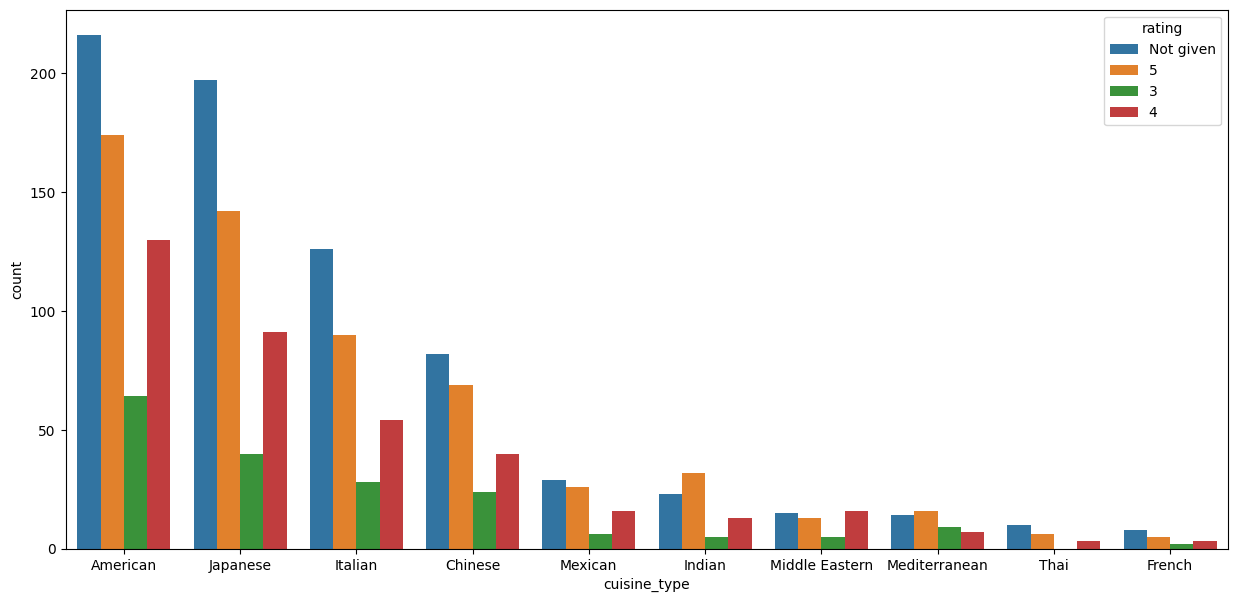

In [ ]:
# relationship between rating and the cuisine type
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating', order = df.cuisine_type.value_counts().iloc[:10].index)

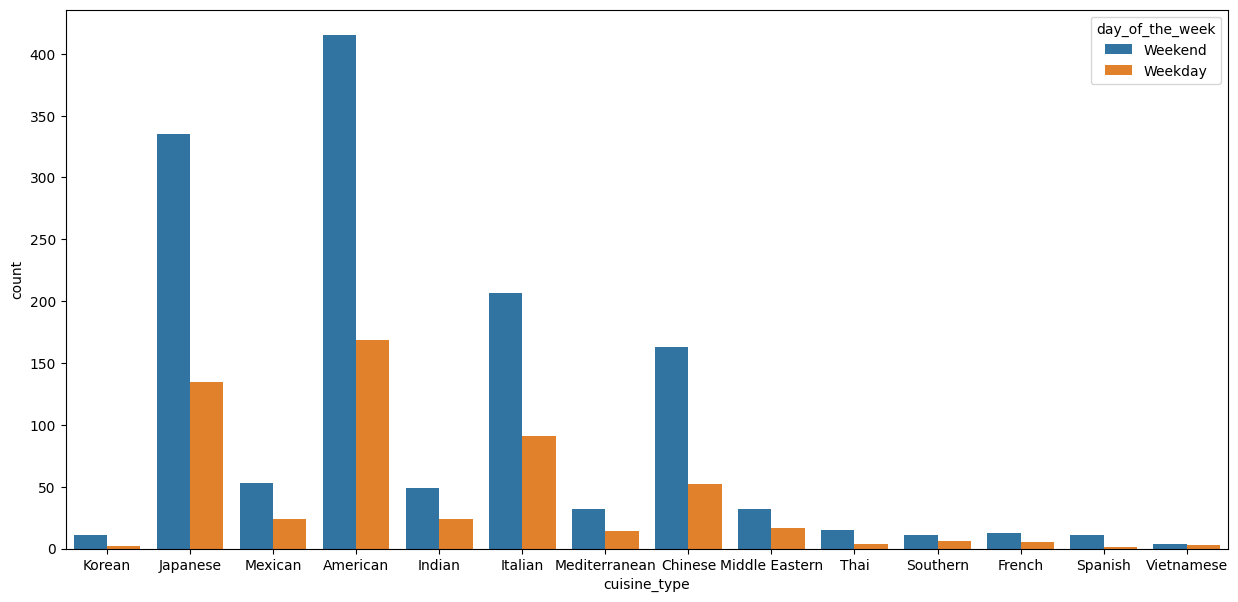

In [ ]:
#plot countplot to examine the relationship between days of the week and cusine type
plt.figure(figsize=(15, 7))
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.show()

**Observations**

During the weekends, the overall demand for the order is higher than that on weekendays.

The popular top 3 cusines types during the week : Amercian , Janpanese and Italian. The same pattern of popularity of the cusine type shows regardless the day of the week.

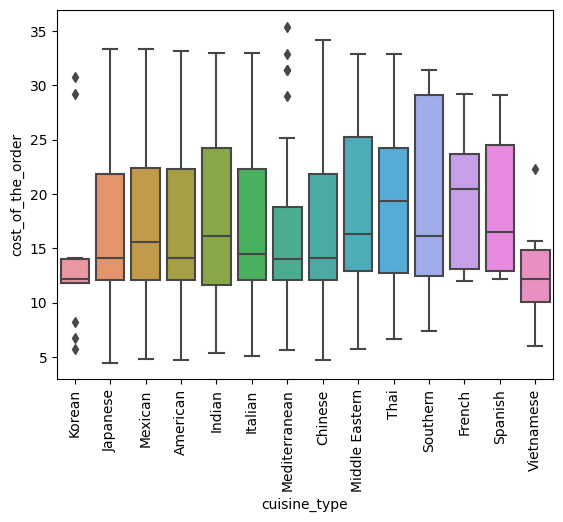

<Figure size 1500x700 with 0 Axes>

In [ ]:
#relationship between Cost of order and Cusine Type
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.figure(figsize=(15, 7))
plt.show();

**Observations**

Ther are a few outliers showing on Korean , Mediterranean and Vietnamese Cusine on the plot.

The boxplot shows a right shewed distrubtion on the cost of the order aganist the cusine type.

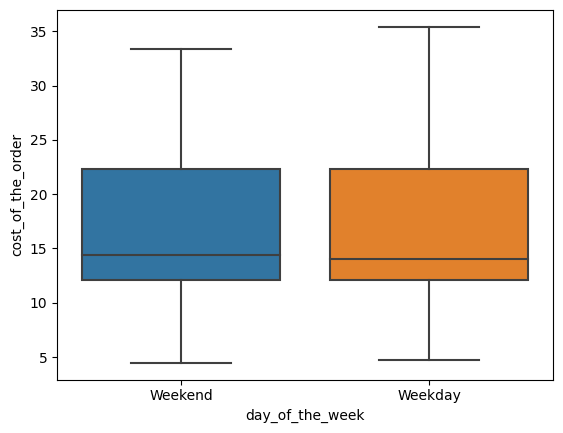

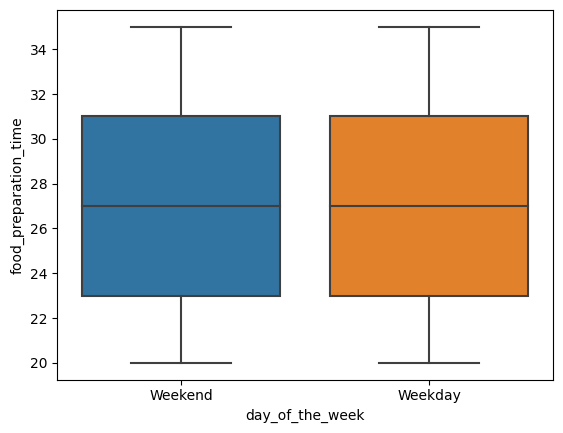

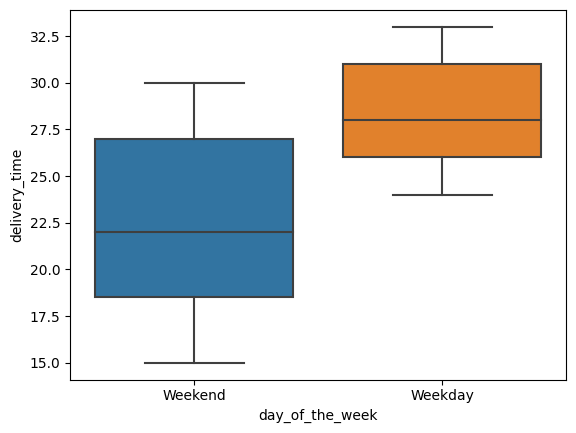

In [ ]:
#relationship between day of the week and cost of the order
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.show()
#relationship between day of the week and food preparation time
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()

#relationship between day of the week and delivery time
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

# Obervation
The only difference found is that the delivery time takes longer during the weekendays than that in weekends. The median delivery time for weekend is about 22.5 min whereas the time taken during the weekdays is about 28.5 min.


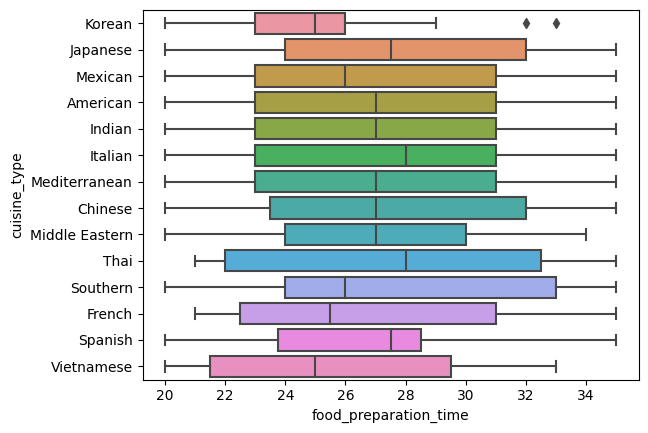

In [ ]:
#relationship between food preparation time and cuisine type
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.show()

# Obervations

There are a few outliers in Korean food for food preparation time.

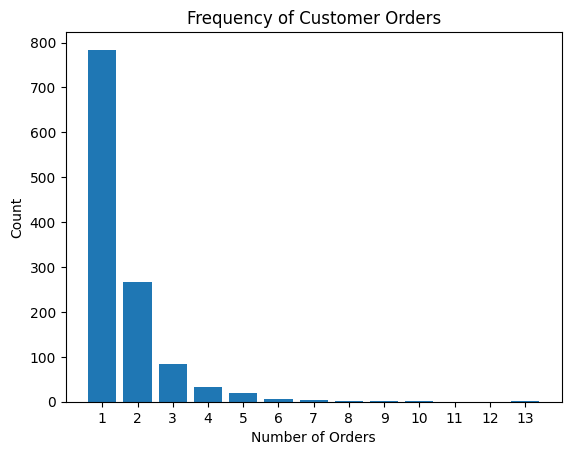

<Figure size 2000x1500 with 0 Axes>

In [ ]:
# Group orders by customer and count the number of orders
customer_order_counts = df.groupby('customer_id')['order_id'].count()

# Count the frequency of each order count
frequency_counts = customer_order_counts.value_counts().sort_index()

# Calculate the total number of customers
total_customers = len(customer_order_counts)

# Calculate the percentage for each frequency count
percentage_counts = (frequency_counts / total_customers) * 100

# Plot the bar graph
plt.bar(frequency_counts.index, frequency_counts.values)
plt.xlabel('Number of Orders')
plt.ylabel('Count')
plt.title('Frequency of Customer Orders')
plt.xticks(range(1, max(customer_order_counts) + 1))
plt.figure(figsize=(20, 15))
plt.show()


**Frequency of order made by customer **


Most of the customers (about 790 customers) only place order once.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rows with "Not given" in "rating" column
df_rating= df.loc[df['rating'] != 'Not given'].copy()

In [ ]:
# Convert "rating" column to numeric
df_rating['rating'] = pd.to_numeric(df_rating['rating'])

In [ ]:
# check if the rating column is numeric
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


In [ ]:
# mean of the rating
mean_rating = df_rating['rating'].mean()

mean_rating

4.344234079173838

In [ ]:
# Group by restaurant name and count ratings score greater than 4 and rating count more than 50
restaurant_rating = df_rating.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
promo_restaurant = restaurant_rating[(restaurant_rating['count'] > 50) & (restaurant_rating['mean'] > 4)]
promo_restaurant

,restaurant_name,count,mean
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


**Obersvation : **
The shortlisted resturants to claim the offer are : Blue Ribbon Fried Chicken
Blue Ribbon Sushi,	Shake Shack and The Meatball Shop, which has the highest average rating 4.51.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#calculate revenue for order
def rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(rev)


In [ ]:
total_rev = df['Revenue'].sum()
print(total_rev)

6166.303


#### Observations:

The Company has net revenue 6166.303 dollars generated. For those order cost below 5 dollars, the charge is assumed to be 0.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# calculate the total time required to deliver the food
total_delivery_time = df['food_preparation_time'] + df['delivery_time']

# count the number of orders that take more than 60 minutes to get delivered
num_orders_over_60_min = (total_delivery_time > 60).sum()

# calculate the percentage of orders that take more than 60 minutes to get delivered
percent_orders_over_60_min = (num_orders_over_60_min / len(df)) * 100

print('Percentage of orders that take more than 60 minutes to get delivered:', percent_orders_over_60_min)


Percentage of orders that take more than 60 minutes to get delivered: 10.537407797681771


#### Observations:

About 10.53% of the orders takes more than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# calculate the mean delivery time for each day of the week
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

print(mean_delivery_time_by_day)


day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64



#### Observations:

The mean delivery time of the orders on weekdays and weekends is 28.34 min and 22.47 min respectively. This shows that the difference between the mean delivery time during weekday and weekend is about 5.87 min.
Possible cause to this may be due to not enough staff to do the delivery during the weeekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

**Conclusions:**
The conclusions are below :
1.   Order made mostly during weekend : From the finding, customers prefer to order during weekends than weekdays, order during weekday is about 28.8 % of the total order number of the week. The order made during weekends is made up more than 70% of the total number of order of the week.

2.   Customers's choice of the cuisine - American :According to the finding, the most popular cuisine is American.

3. Feedback on the rating : The rating score of 5 is about 31%, whereas, there are about 39% rating not given. The mean rating is about 4.34 out of 5, which is considerate quite satisfying.

4. Frequency of order made by customer : Most of the customers (about 790 customers) only place order once.

### Recommendations:
Based on the findings, some recommendations are made below to help improve the business :

1. Promotions on the weekday order made
In order to target more customers to order during weekdays, which is now about 28.8% of orders made weekdays, the company should consider to give incentives to attract customers to make order during weekdays, such as promotions on the price, special lunch or dinner menus only available during weekdays, for example Monday Green menus, Happy Wednesday ‘Game box’ for sharing dinner menus. This helps increase the order volume on weekdays.

2. Marketing strategy of American Cuisine
The finding shows that American Cuisine is most popular in the dataset. To develop marketing strategy especially for those American cuisine such as offering discounts , highlighting the special American dishes e.g. American Pizza Night, Hotdog Quick lunch for those busy people who work from home or extend the business partnership with more American restaurants

3. Strengthen customer feedback and reviews
Now there are about 39% of rating as ‘not given’. In order to encourage more customers to give reviews every time they order. The company can consider to give incentive to the customers, such as free drink. This review and feedback of customer can provide the company the important data on the overall quality of service and identify areas for improvement.

4. Customer loyalty program
The data shows that the majority of customer (about 790 customers) only places once order. To encourage the customer to order repeatedly, the company should implement loyalty programs such as providing incentives and rewards, this helps more customers to place order more frequently. Also, the company can implement the referral scheme , so that customers invite their friends or family to use the service and both of them can get promotions on their order. This also helps drive the business volume.

---